In [5]:
# Step1 

# Import the packages to be used in this project..

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [7]:
# Step 2 

# Reading in the data and creating a DataFrame

df = pd.read_csv(r'C:\Users\mpmac\MoviesFile\movies.csv')

In [61]:
# Step 3
# Take a look at the DataFrame

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [69]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    2
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## Replacing the NaN values in the score column with the mean of the column

In [32]:
# df["score"].unique()
# df["score"].mean()

mean_s = df["score"].mean()
print(mean_s)
df["score"].fillna(mean_s, inplace = True)


6.390410958904109


## Replacing NaN values with in the mean of the votes column

In [37]:

# df["votes"].unique()

mean_v = df["votes"].mean()
# print(mean_v)
df["votes"].fillna(mean_s, inplace = True)

In [21]:
df["rating"].fillna("Not Rated", inplace = True)

## Replacing NaN values it the Writer Column

In [41]:

df["writer"].unique()
df["writer"].fillna("Unknown Writer", inplace = True)

# for col in df.columns:
#     pct_missing = np.mean(df[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))

## Replacing NaN values in the Star Column

In [46]:
df["star"].unique()

df["star"].unique()
df["star"].fillna("Unknown Star", inplace = True)

## Replacing NaN values in the Country column

In [49]:
# df["country"].unique()

df["country"].unique()
df["country"].fillna("Unknown Country", inplace = True)

## Replacing NaN values in the budget column with the mean of the column

In [52]:
mean_b = df["budget"].mean()
print(mean_b)
df["budget"].fillna(mean_b, inplace = True)

35589876.192650534


## Replacing NaN values in the gross column with the mean of that column

In [55]:
mean_gr = df["gross"].mean()
print(mean_gr)
df["gross"].fillna(mean_gr, inplace = True)

78500541.01778312


## Replacing NaN values in the Company column

In [65]:
df["company"].unique()

df["company"].fillna("Unknown Company", inplace = True)

## Looking at the Runtime values and replacing it with the mean()

In [68]:
mean_ru = df["runtime"].mean()
print(mean_ru)
df["runtime"].fillna(mean_ru, inplace = True)

107.2616127348643


## Splitting the Released Column into Date_Released and Country_Released

In [73]:
# df["released"].unique()

df[["release_date", "release_country"]] = df["released"].str.split("(", expand = True)



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


## Removing the closed bracket in the Release_Country column

In [75]:
df["release_country"] = df["release_country"].str.replace(")", " ")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


## Changing the Release Date column from Object  to Date type

### Firstly remove trailing spaces for the column

In [78]:
df["release_date"] = df["release_date"].str.strip()

### Now change the release_date Object type to Datetime format

In [82]:
df["release_date"] = pd.to_datetime(df["release_date"], format= "%B %d, %Y", infer_datetime_format = True)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


In [85]:
# Checking for null values

df.isnull().sum()

name               0
rating             0
genre              0
year               0
released           2
score              0
votes              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
release_date       2
release_country    2
dtype: int64

## Since there are only 2 rows with null values and they are contained together,
## these rows will be deleted completely.

In [90]:
# df["release_date"].unique()

df.dropna(subset=['release_date'], inplace=True)
df.head()
df.isnull().sum()


name               0
rating             0
genre              0
year               0
released           0
score              0
votes              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
release_date       0
release_country    0
dtype: int64

In [83]:
# Data Types for our columns

print(df.dtypes)

name                       object
rating                     object
genre                      object
year                        int64
released                   object
score                     float64
votes                     float64
director                   object
writer                     object
star                       object
country                    object
budget                    float64
gross                     float64
company                    object
runtime                   float64
release_date       datetime64[ns]
release_country            object
dtype: object


In [92]:
## Saving the currently altered file
df.to_csv("movies_updated.csv", index = False)

## Import the updated Movies file

In [93]:
df = pd.read_csv("movies_updated.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


## Since the released column was split into released_date and released_country I will now drop the release column

In [100]:
# df.drop(['released'], axis = 1, inplace = True)
df.to_csv("movies_updated.csv", index = False)

In [101]:
df = pd.read_csv("movies_updated.csv")
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


## More Data Cleaning

### Changing the Budget and Gross data type from float64 to integer.

In [102]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [106]:
df.dtypes

name                object
rating              object
genre               object
year                 int64
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget               int64
gross                int64
company             object
runtime            float64
release_date        object
release_country     object
dtype: object

## Looking to see what the Highest grossing movie was

In [108]:

df.sort_values(by=['gross'], inplace=True, ascending=False)
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
7443,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
6661,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7242,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States


## To Display all rows use:

In [110]:
pd.set_option('display.max_rows', None)

## Looking for and Dropping any Duplicates

In [ ]:
# To drop duplicates
# df.drop_duplicates

## Saving the cleaned Data as CSV File

In [111]:
df.to_csv("movies_cleaned.csv", index = False)


##  Importing the Cleaned File

In [114]:
df = pd.read_csv('movies_cleaned.csv')
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
1,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
2,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
4,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States


##  Doing a Scatterplot with Budget Cost vs Gross Revenue

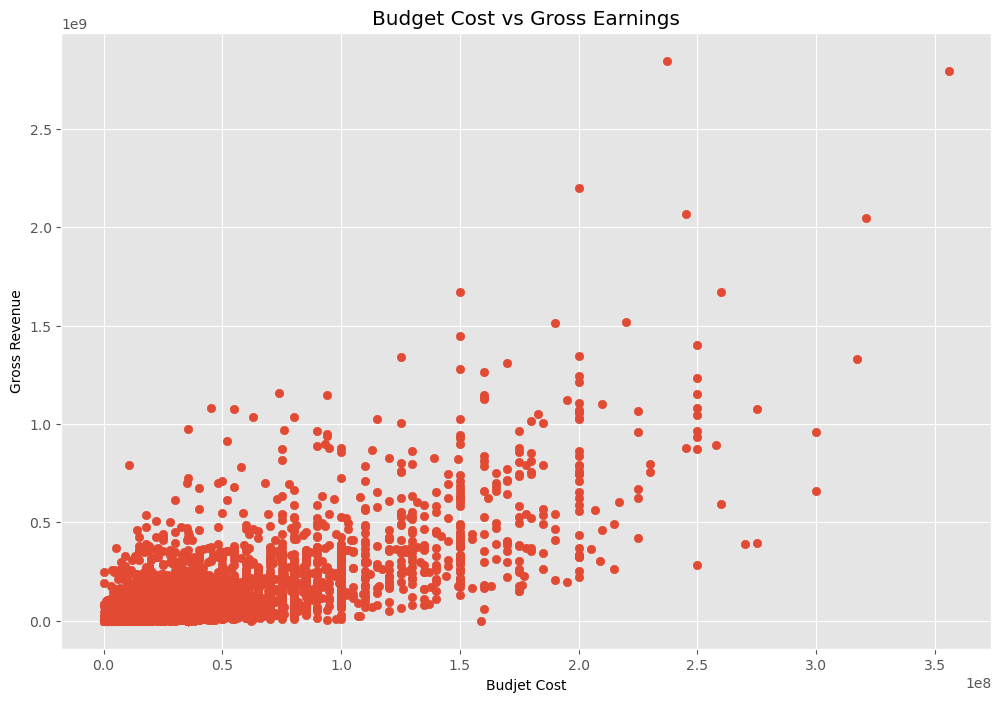

In [117]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Cost vs Gross Earnings')
plt.xlabel('Budjet Cost')
plt.ylabel('Gross Revenue')
plt.show();

## Checking to see if there is a correlation between Budget Costs and Gross Revenue

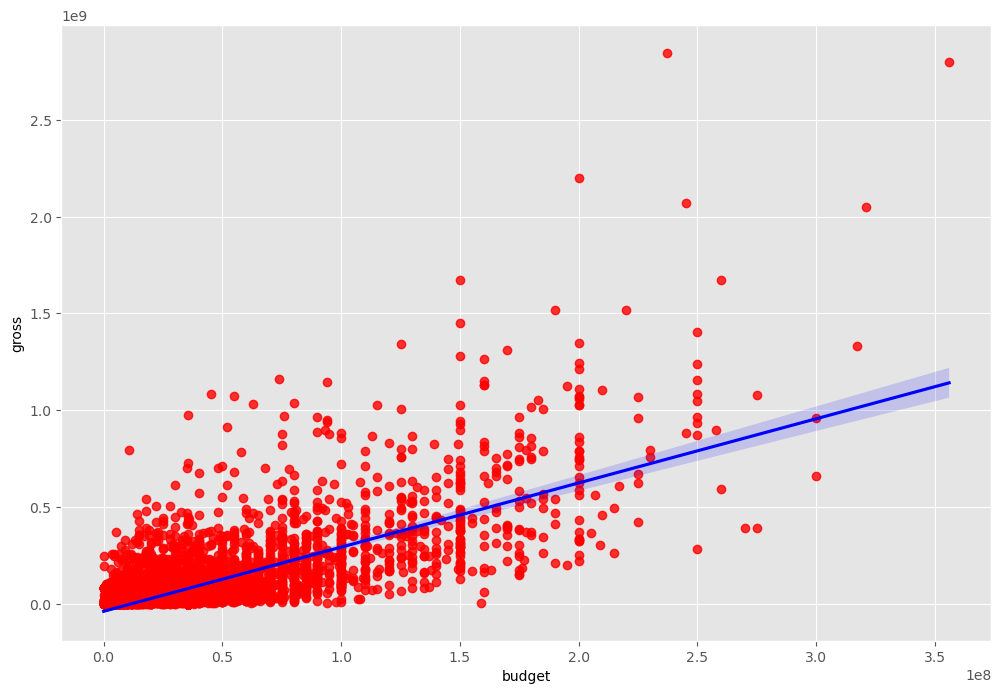

In [121]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'});

##  Looking at the Plot above there does appear to be a Positive Correlation

### Determining the Amount of Correlation

In [126]:
df.corr(method= 'pearson', numeric_only=True) # correlation types: pearson - default, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098112,0.222434,0.265604,0.252066,0.120778
score,0.098112,1.000000,0.409198,0.064545,0.182880,0.399356
votes,0.222434,0.409198,1.000000,0.421195,0.628678,0.309114
budget,0.265604,0.064545,0.421195,1.000000,0.711270,0.265287
gross,0.252066,0.182880,0.628678,0.711270,1.000000,0.241335
runtime,0.120778,0.399356,0.309114,0.265287,0.241335,1.000000


## Visualising the Correlation Matrix

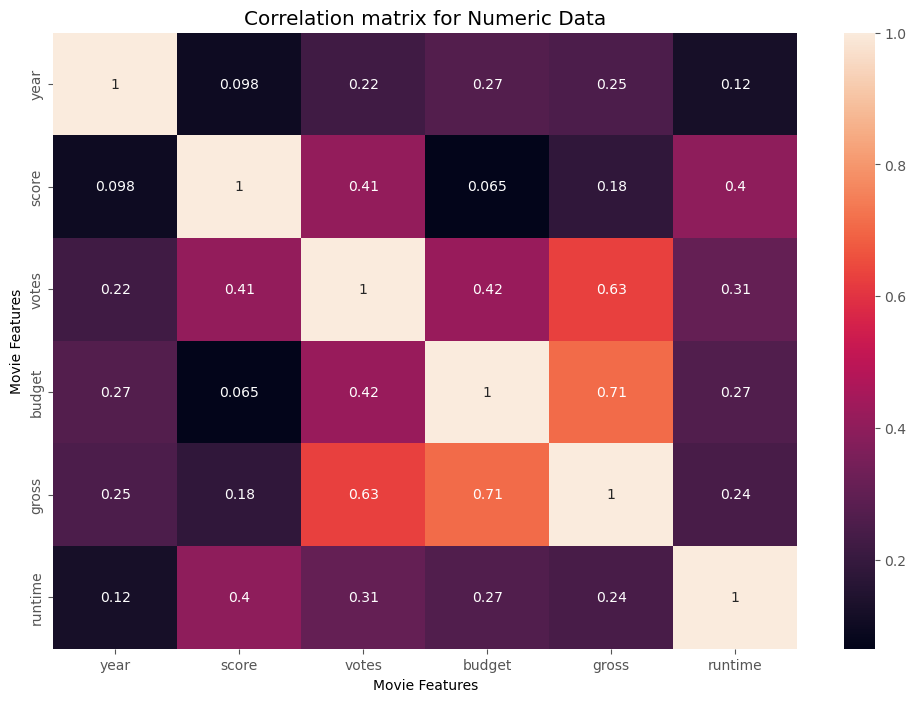

In [129]:
correlation_matrix = df.corr(method= 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show();

## Checking for Correllation Between Company and Gross Revenue

###  First I need to Numerise the Company Data

In [141]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,533,5,0,2009,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2103,56
1,535,5,0,2019,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2862,56
2,6894,5,6,1997,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1220,56
3,5143,5,0,2015,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2606,56
4,536,5,0,2018,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2777,56


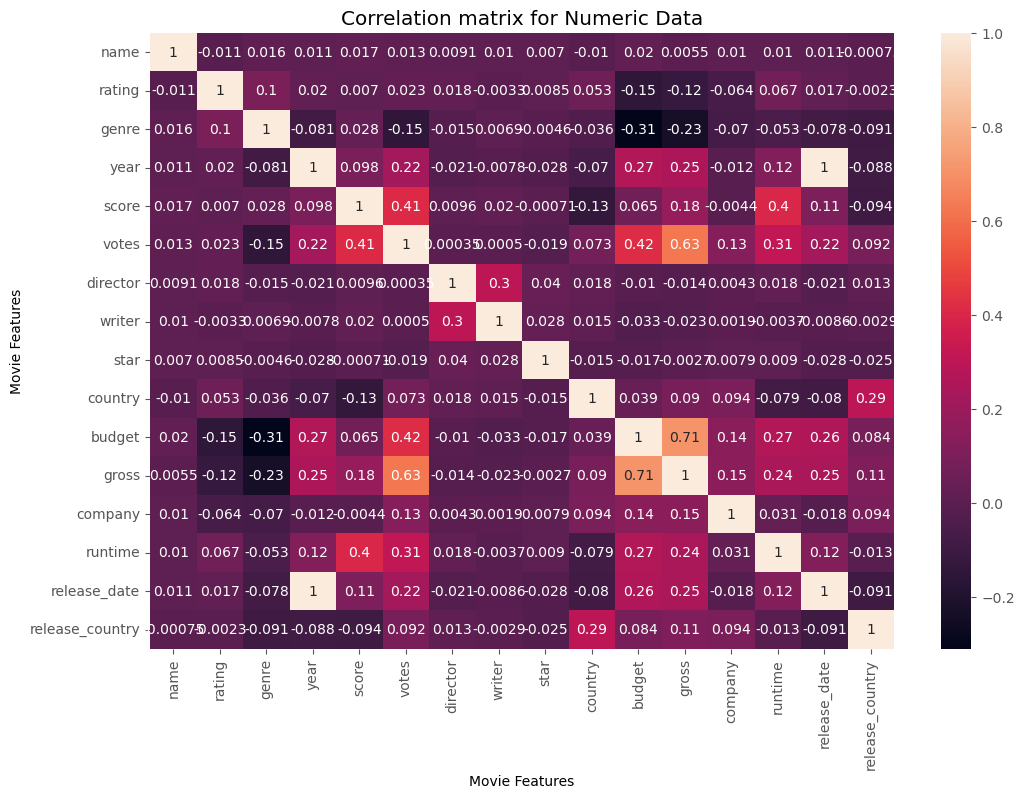

In [134]:
correlation_matrix = df_numerized.corr(method= 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show();


In [135]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
name,1.000000,-0.011034,0.016173,0.011245,0.017258,0.013019,0.009111,0.010238,0.007021,-0.010487,0.020369,0.005465,0.010085,0.010391,0.011261,-0.000754
rating,-0.011034,1.000000,0.103997,0.019758,0.006957,0.023015,0.018477,-0.003324,0.008466,0.053159,-0.148382,-0.122045,-0.064494,0.067182,0.017304,-0.002333
genre,0.016173,0.103997,1.000000,-0.081426,0.028084,-0.145318,-0.015242,0.006879,-0.004579,-0.035876,-0.310586,-0.230282,-0.070264,-0.052702,-0.077504,-0.090991
year,0.011245,0.019758,-0.081426,1.000000,0.098112,0.222434,-0.020785,-0.007837,-0.027930,-0.069713,0.265604,0.252066,-0.011701,0.120778,0.997122,-0.088460
score,0.017258,0.006957,0.028084,0.098112,1.000000,0.409198,0.009553,0.019745,-0.000709,-0.134366,0.064545,0.182880,-0.004360,0.399356,0.107271,-0.094017
votes,0.013019,0.023015,-0.145318,0.222434,0.409198,1.000000,0.000352,0.000505,-0.019373,0.073418,0.421195,0.628678,0.130540,0.309114,0.217671,0.092335
director,0.009111,0.018477,-0.015242,-0.020785,0.009553,0.000352,1.000000,0.299532,0.039828,0.018022,-0.010364,-0.014272,0.004266,0.017624,-0.021303,0.013305
writer,0.010238,-0.003324,0.006879,-0.007837,0.019745,0.000505,0.299532,1.000000,0.028455,0.014550,-0.033229,-0.023196,0.001864,-0.003693,-0.008647,-0.002929
star,0.007021,0.008466,-0.004579,-0.027930,-0.000709,-0.019373,0.039828,0.028455,1.000000,-0.015109,-0.017061,-0.002679,0.007911,0.008960,-0.028010,-0.025366
country,-0.010487,0.053159,-0.035876,-0.069713,-0.134366,0.073418,0.018022,0.014550,-0.015109,1.000000,0.038577,0.089832,0.094037,-0.079190,-0.080466,0.294778


In [136]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.011034
                 genre              0.016173
                 year               0.011245
                 score              0.017258
                 votes              0.013019
                 director           0.009111
                 writer             0.010238
                 star               0.007021
                 country           -0.010487
                 budget             0.020369
                 gross              0.005465
                 company            0.010085
                 runtime            0.010391
                 release_date       0.011261
                 release_country   -0.000754
rating           name              -0.011034
                 rating             1.000000
                 genre              0.103997
                 year               0.019758
                 score              0.006957
                 votes              0.023015
          

In [140]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre            budget            -0.310586
budget           genre             -0.310586
genre            gross             -0.230282
gross            genre             -0.230282
budget           rating            -0.148382
rating           budget            -0.148382
votes            genre             -0.145318
genre            votes             -0.145318
score            country           -0.134366
country          score             -0.134366
gross            rating            -0.122045
rating           gross             -0.122045
score            release_country   -0.094017
release_country  score             -0.094017
                 release_date      -0.091278
release_date     release_country   -0.091278
genre            release_country   -0.090991
release_country  genre             -0.090991
                 year              -0.088460
year             release_country   -0.088460
                 genre             -0.081426
genre            year              -0.081426
release_da

In [138]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross            votes              0.628678
votes            gross              0.628678
gross            budget             0.711270
budget           gross              0.711270
year             release_date       0.997122
release_date     year               0.997122
name             name               1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
release_date     release_date       1.000000
release_country  release_country    1.000000
dtype: flo